In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bike_sharing_dataset = fetch_ucirepo(id=275) 
  
# data (as pandas dataframes) 
X = bike_sharing_dataset.data.features 
y = bike_sharing_dataset.data.targets 
  
# metadata 
print(bike_sharing_dataset.metadata) 
  
# variable information 
print(bike_sharing_dataset.variables) 


{'uci_id': 275, 'name': 'Bike Sharing Dataset', 'repository_url': 'https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/275/data.csv', 'abstract': 'This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.', 'area': 'Social Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 17389, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['cnt'], 'index_col': ['instant'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2013, 'last_updated': 'Wed Dec 20 2023', 'dataset_doi': '10.24432/C5W894', 'creators': ['Hadi Fanaee-T'], 'intro_paper': None, 'additional_info': {'summary': 'Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return

In [4]:
#check the distribution of int64 values (from the metadata they are categorical values)

for feature in X.columns[X.dtypes=="int64"]:
    print(feature)
    print(X[feature].value_counts())
    print()
    
#weathersit feature has for value 4 only 3 values, lets include it in category 3 

season
3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64

yr
1    8734
0    8645
Name: yr, dtype: int64

mnth
5     1488
7     1488
12    1483
8     1475
3     1473
10    1451
6     1440
4     1437
9     1437
11    1437
1     1429
2     1341
Name: mnth, dtype: int64

hr
17    730
16    730
15    729
14    729
13    729
22    728
18    728
12    728
19    728
23    728
20    728
21    728
7     727
11    727
10    727
9     727
8     727
0     726
6     725
1     724
5     717
2     715
4     697
3     697
Name: hr, dtype: int64

holiday
0    16879
1      500
Name: holiday, dtype: int64

weekday
6    2512
0    2502
5    2487
1    2479
3    2475
4    2471
2    2453
Name: weekday, dtype: int64

workingday
1    11865
0     5514
Name: workingday, dtype: int64

weathersit
1    11413
2     4544
3     1419
4        3
Name: weathersit, dtype: int64



In [5]:


#the columns dropped here are selected after running the VIF factor multiple times, considering that humidity and temperature 
#affects real temperature I dropped them in order to avoid multicollinearity
X=X.drop(['atemp','hum'],axis=1)

# Select numerical features
numerical_features = X[['temp',  'windspeed']]
# Calculate VIF for each feature
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(numerical_features.values, i) for i in range(numerical_features.shape[1])]
vif["Feature"] = numerical_features.columns

# Set a threshold for VIF (common threshold is 5)
vif_threshold = 5

# Identify and drop features with high VIF
features_to_drop = vif[vif["VIF Factor"] > vif_threshold]["Feature"].tolist()

print("Features with multicollinearity dropped:", features_to_drop)


Features with multicollinearity dropped: []


In [25]:
vif

,VIF Factor,Feature
0,2.549559,temp
1,2.549559,windspeed


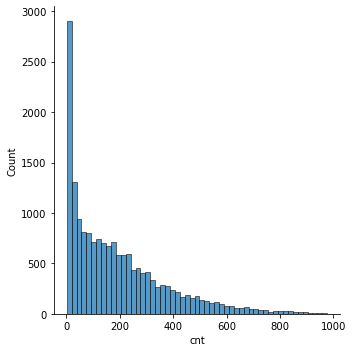

In [7]:
#check the distribution of target variable

import seaborn as sns

sns.displot(y, x="cnt")



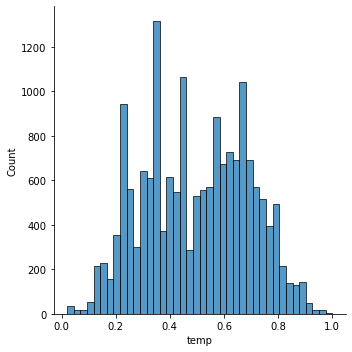

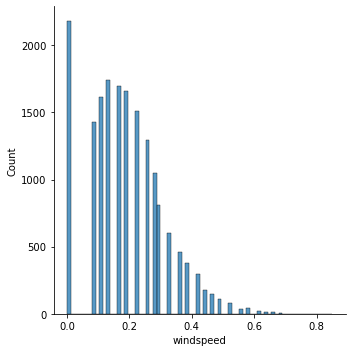

In [8]:

for feature in X.columns[X.dtypes=="float64"]:
    sns.displot(X, x=feature)

    

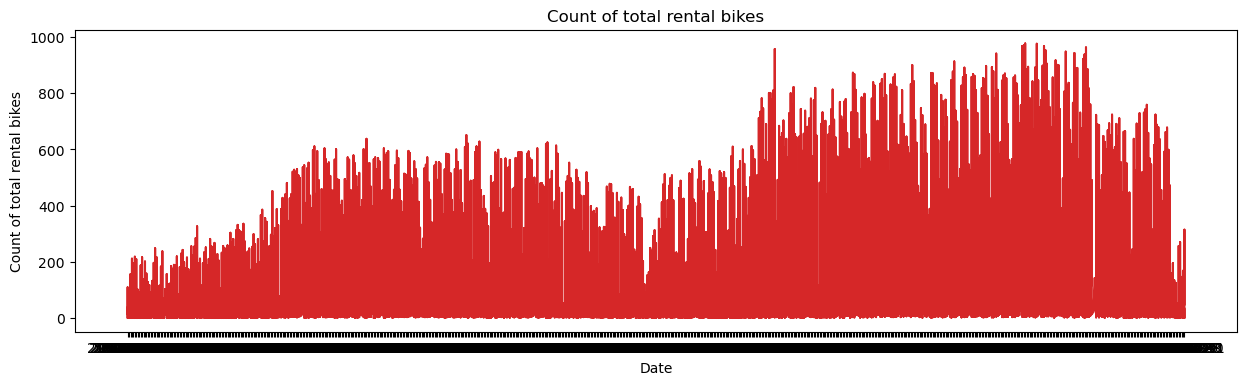

In [9]:
#since we have hourly data lets check the dataset for time series characteristics

#firstly lets join the datasets in order to make the plotting easier

X['cnt']=y['cnt']
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Count of total rental bikes', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(X, x=X['dteday'], y=X['cnt'], title='Count of total rental bikes')

#since the samples of 2010 and 2011 are almost equal, in the plot there are signs of sesionality and increasing trend
#however further analysis is needed

[Text(0.5, 1.0, 'Season wise hourly distribution of counts')]

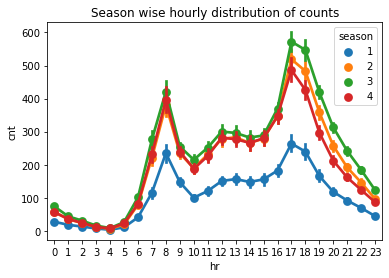

In [10]:
fig,ax = plt.subplots()
sns.pointplot(data=X[['hr',
                           'cnt',
                           'season']],
              x='hr',
              y='cnt',
              hue='season',
              ax=ax)
ax.set(title="Season wise hourly distribution of counts")

[Text(0.5, 1.0, 'Holiday wise hourly distribution of counts')]

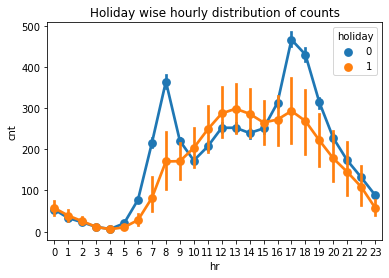

In [11]:
fig,ax = plt.subplots()
sns.pointplot(data=X[['hr',
                           'cnt',
                           'holiday']],
              x='hr',
              y='cnt',
              hue='holiday',
              ax=ax)
ax.set(title="Holiday wise hourly distribution of counts")

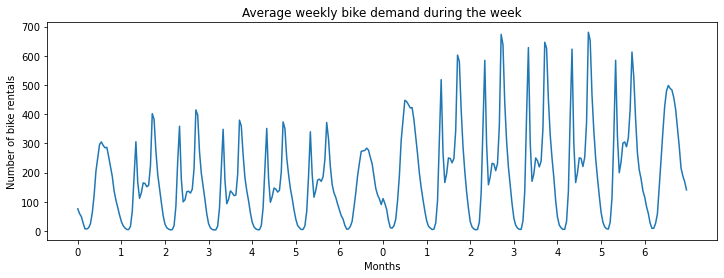

In [30]:
#lets visualize based on weeks for a better view

average_weekly_demand = X.groupby(["yr","weekday","hr"])["cnt"].mean()

xlabels=[]
for weekday in average_weekly_demand.index:
    xlabels.append(weekday[1])
    
    
fig, ax = plt.subplots(figsize=(12, 4))
average_weekly_demand.plot(ax=ax)
_ = ax.set(
    title="Average weekly bike demand during the week",
    xticks=[i * 24 for i in range(14)],
    xticklabels=list(set(xlabels))*2,
    xlabel="Months",
    ylabel="Number of bike rentals",
)


#as shown in the graph weekdays have a higher demand in the morning and evening
#weekends and weekdays show different types of behavior

In [31]:
X['dteday']=pd.to_datetime(X["dteday"])

#X=X.set_index('dteday')

[Text(0.5, 1.0, 'Monthly distribution of counts')]

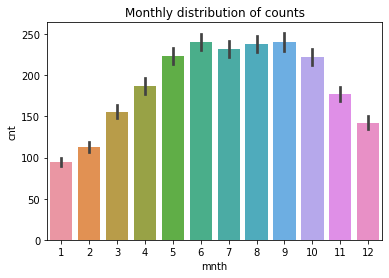

In [32]:
fig,ax = plt.subplots()
sns.barplot(data=X[['mnth','cnt']],
              x='mnth',
              y='cnt',
              ax=ax)
ax.set(title="Monthly distribution of counts")

[Text(0.5, 1.0, 'Holidays distribution of counts')]

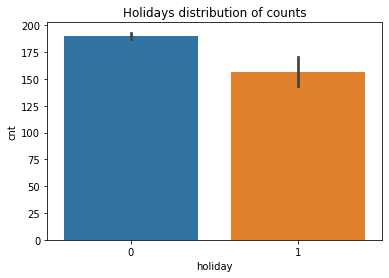

In [13]:
fig,ax = plt.subplots()
sns.barplot(data=X[['holiday','cnt']],
              x='holiday',
              y='cnt',
              ax=ax)
ax.set(title="Holidays distribution of counts")

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

def seasonal_decompose_plots(df,period):
# Multiplicative Decomposition 
    multiplicative_decomposition = seasonal_decompose(df['cnt'], model='multiplicative', period=period)

    # Additive Decomposition
    additive_decomposition = seasonal_decompose(df['cnt'], model='additive', period=period)

    # Plot
    plt.rcParams.update({'figure.figsize': (16,12)})
    multiplicative_decomposition.plot().suptitle('{} Multiplicative Decomposition'.format(period), fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    additive_decomposition.plot().suptitle('{} Additive Decomposition'.format(period), fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    return plt.show()



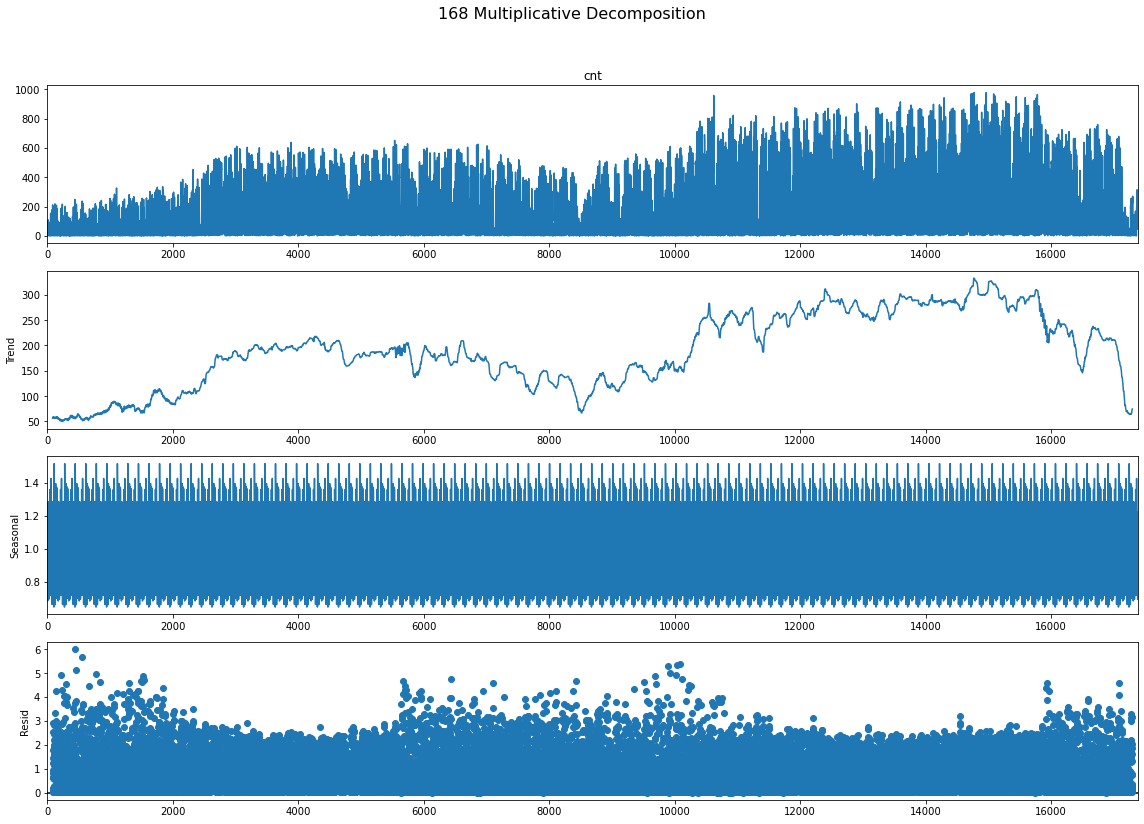

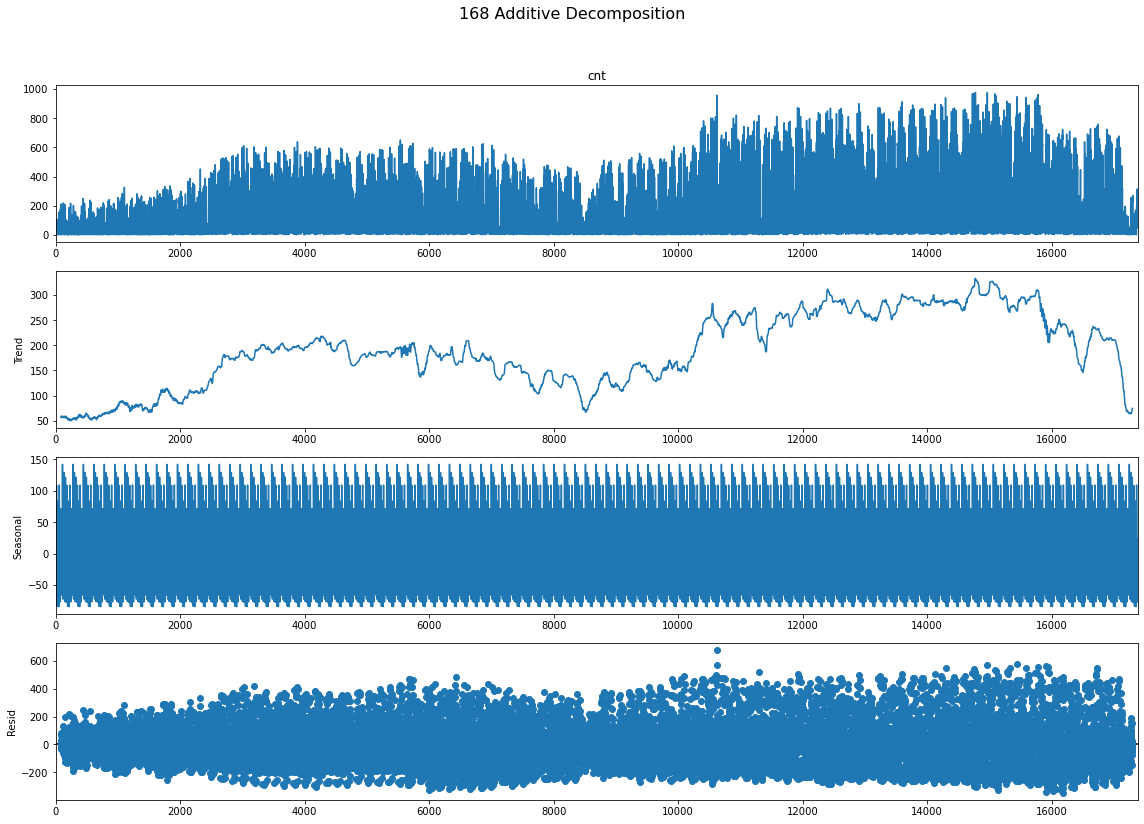

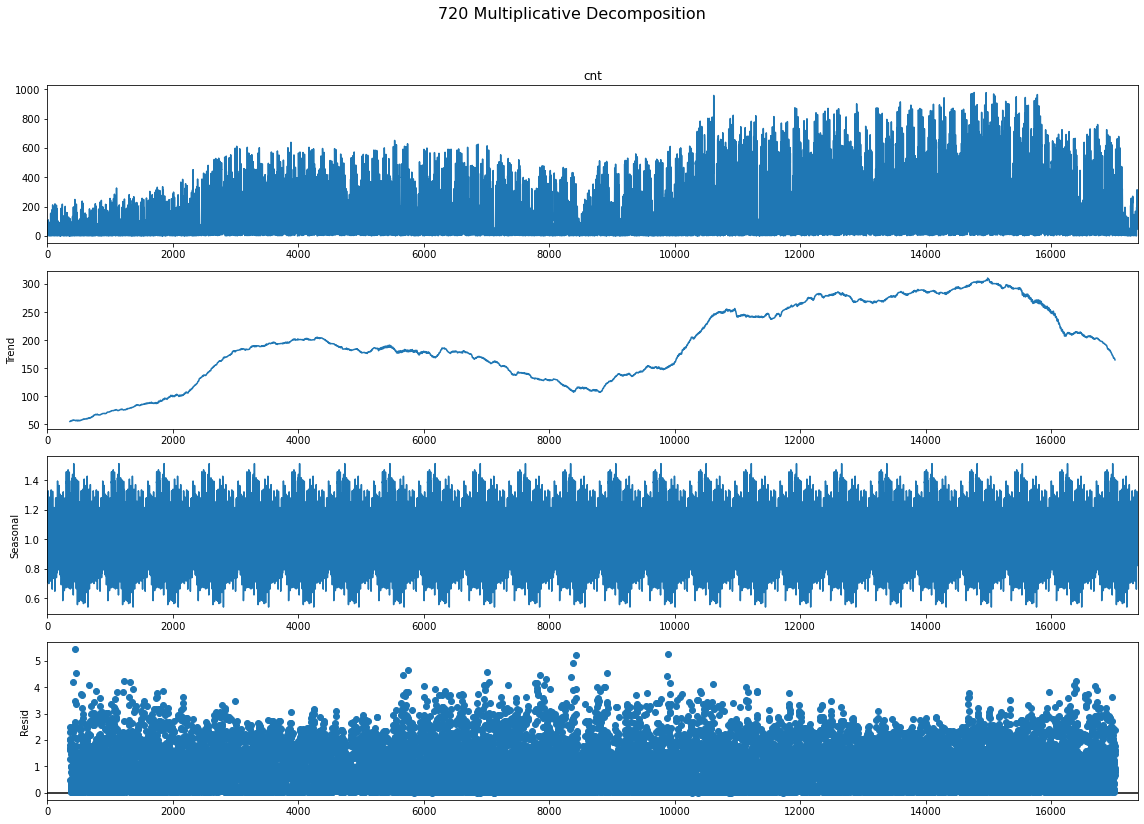

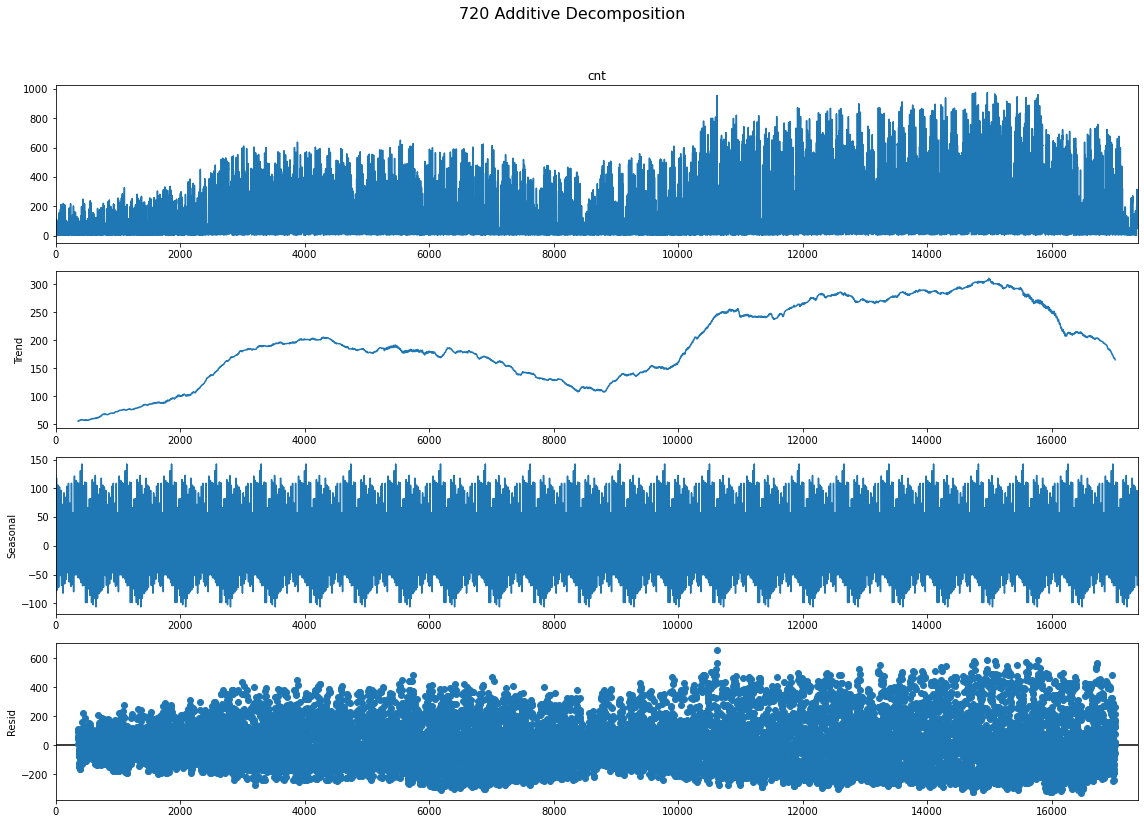

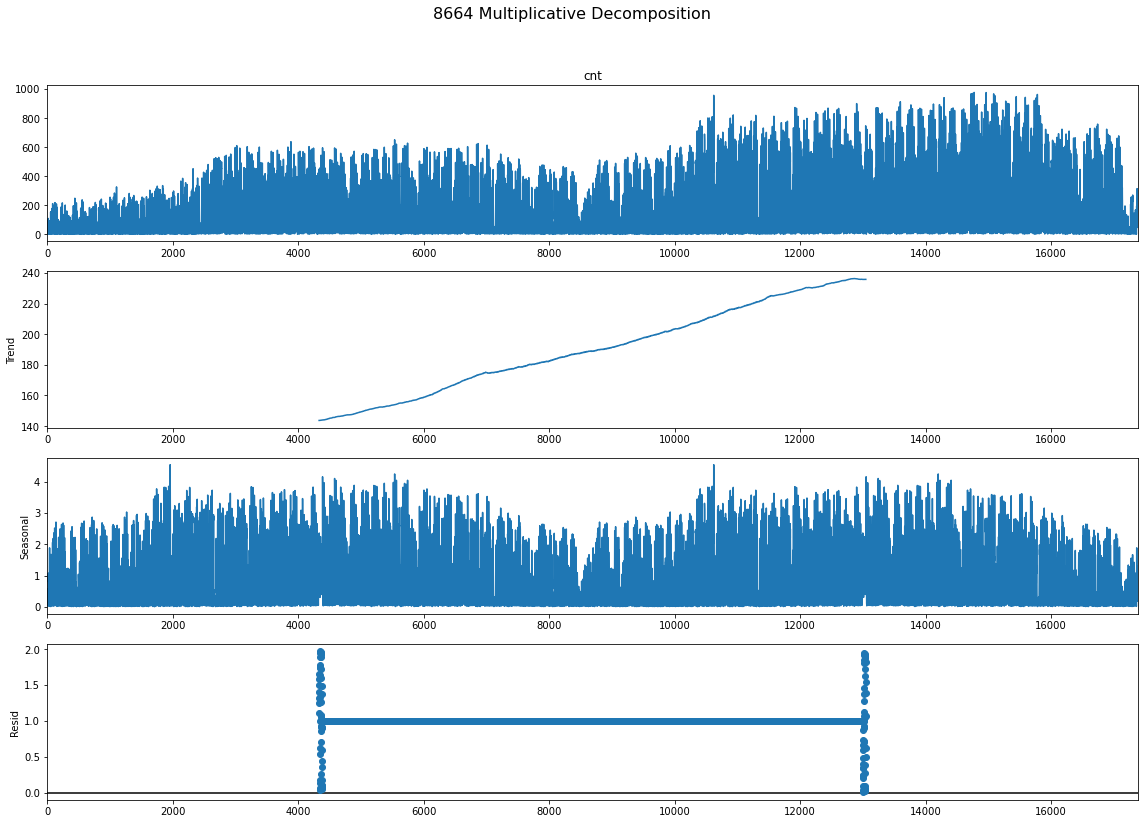

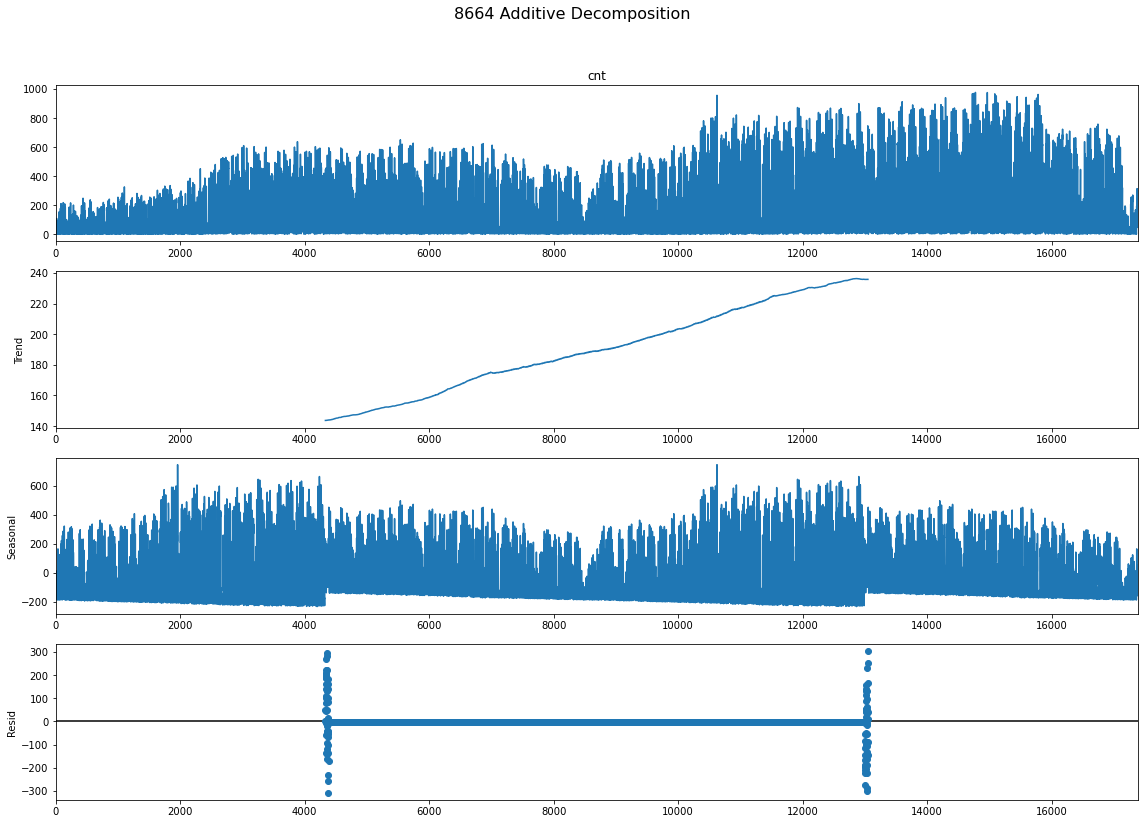

In [34]:
#weekly and monthly number of rows
periods=[24*7, 24*30,24*361]

for period in periods:
    seasonal_decompose_plots(X,period)
    
#both graphs give a better understanding that we have a time series with trend and seasonality


In [35]:
#lets create some lag values and analyse them

lagged_df = pd.concat(
    [
        X,
        X['cnt'].shift(24).rename("lagged_count_24h"),
        X['cnt'].shift(24+1).rename("lagged_count_25h"),
        X['cnt'].shift(7*24).rename("lagged_count_7d"),
        X['cnt'].shift(7*24+1).rename("lagged_count_7d1h"),
        
        X['temp'].shift(24).rename("lagged_temp_24h"),
        X['temp'].shift(24+1).rename("lagged_temp_25h"),
        
        X['windspeed'].shift(24).rename("lagged_windspeed_24h"),
        X['windspeed'].shift(24+1).rename("lagged_windspeed_25h"),

        
    ],
    axis="columns",
)

lagged_df

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,windspeed,cnt,lagged_count_24h,lagged_count_25h,lagged_count_7d,lagged_count_7d1h,lagged_temp_24h,lagged_temp_25h,lagged_windspeed_24h,lagged_windspeed_25h
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.0000,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.0000,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.0000,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.0000,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.0000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.1642,119,102.0,125.0,26.0,26.0,0.34,0.24,0.0000,0.2985
17375,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.1642,89,72.0,102.0,18.0,26.0,0.22,0.34,0.3284,0.0000
17376,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.1642,90,47.0,72.0,23.0,18.0,0.20,0.22,0.1642,0.3284
17377,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.1343,61,36.0,47.0,22.0,23.0,0.20,0.20,0.1940,0.1642


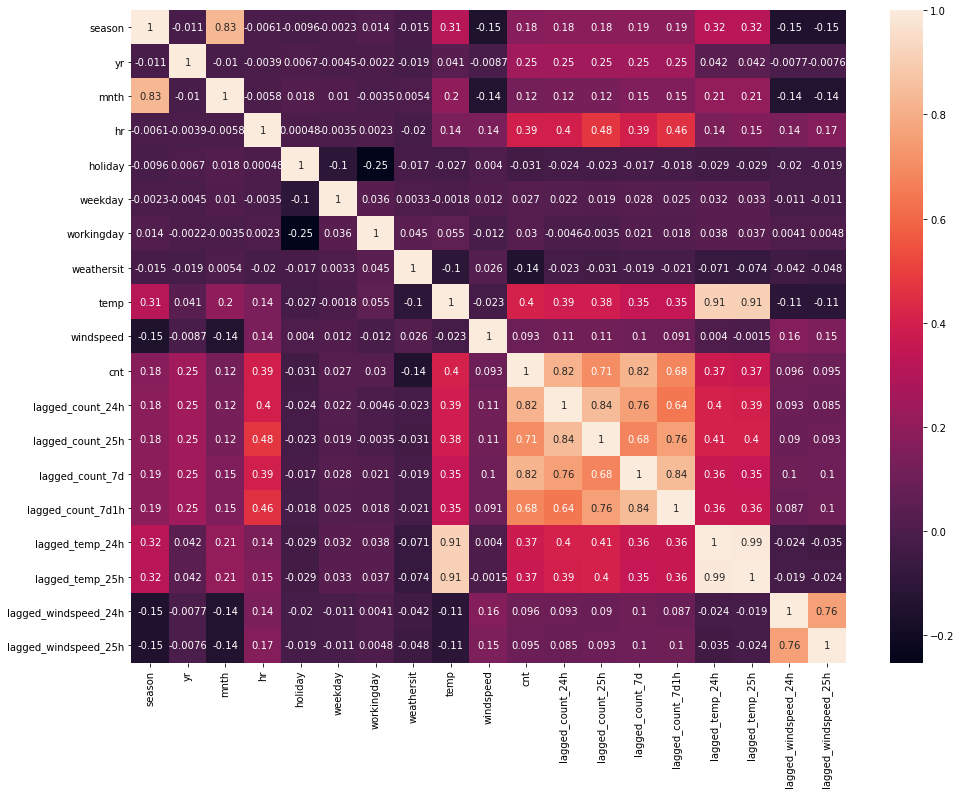

In [36]:
corr_matrix = lagged_df.corr()

sns.heatmap(corr_matrix, annot=True)
plt.show()

In [20]:
#Things to keep in mind

#drop atemp and hum features due to multicolinerity
#lagged values have high correlation
#weekdays have different behaviour than weekends so we can drop weekdays column and keep working day instead
#I will create a model that predicts 24h in advance so, ['temp','atemp','windspeed','hum'] can not be used 